<a href="https://colab.research.google.com/github/ylkim1947/Section1_Project/blob/main/Copy_of_n212a_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes	

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
import numpy as np
import datetime

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **(Urclass Quiz) 훈련데이터 샘플의 갯수를 제출하세요.**

In [6]:
df['date1'] = df.date.str.split('T').str[0]
df['data2'] = df.date.str.split('T').str[1]

In [7]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date1,data2
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013,000000
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209,000000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,000000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209,000000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,000000


In [8]:
df["date1"] = pd.to_numeric(df["date1"])

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
date1              int64
data2             object
dtype: object

In [10]:
### 이곳에서 과제를 진행해 주세요 ###
test_df = df[df['date1'] > 20150100]
train_df = df[df['date1'] < 20150100]


In [11]:
test_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date1,data2
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,000000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,000000
7,2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,20150115,000000
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,20150415,000000
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,20150312,000000


In [12]:
train_df.shape

(14633, 23)

### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- 정규화(normalize) 등 추가적인 데이터처리 없이 진행합니다.
- **(Urclass Quiz) 테스트세트의 MAE 값을 제출하세요.(소수점 이하 반올림)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

features = ['sqft_living']
X_train = train_df[features]
X_test = test_df[features]


# label 정의
target = 'price'
y_train = train_df[target]
y_test = test_df[target]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 170759.21


In [ ]:
# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()

In [ ]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 233990.69


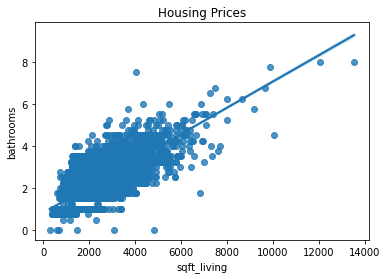

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
import seaborn as sns
sns.regplot(x=train_df['sqft_living'], y=train_df['bathrooms']).set_title('Housing Prices');

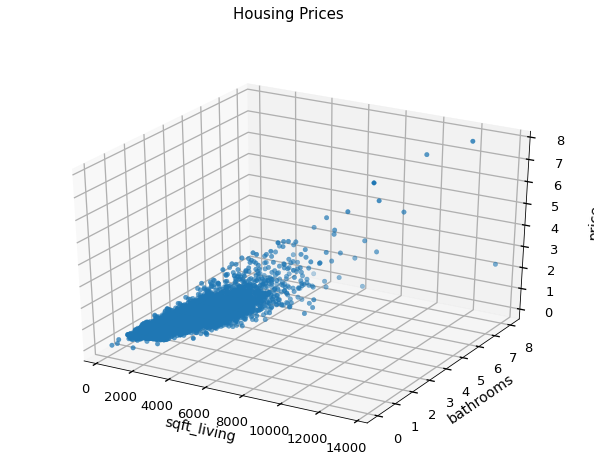

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(train_df['sqft_living'], train_df['bathrooms'], train_df['price'])
ax.set_xlabel('sqft_living', labelpad=12)
ax.set_ylabel('bathrooms', labelpad=10)
ax.set_zlabel('price', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

# (참고) plotly를 사용해서 상대적으로 간단히 그래프를 그릴 수도 있습니다.
# px.scatter_3d(
#     train_df,
#     x='sqft_living', 
#     y='bathrooms', 
#     z='price',  
#     title='House Prices'
# )

In [ ]:
 import plotly.express as px
 
 px.scatter_3d(
     train_df,
     x='sqft_living', 
     y='bathrooms', 
     z='price',  
     title='House Prices')

In [ ]:
# 다중모델 학습을 위한 특성
features = ['sqft_living', 
            'bathrooms']
X_train = train_df[features]
X_test = test_df[features]

In [ ]:
# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 170777.34


In [ ]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 179252.53


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import itertools

def surface_3d(df, f1, f2, target, length=20, **kwargs):
    """
    2특성 1타겟 선형모델평면을 시각화 합니다.
    
    df : 데이터프레임
    f1 : 특성 1 열 이름
    f2 : 특성 2 열 이름
    target : 타겟 열 이름
    length : 각 특성의 관측치 갯수
    
    """
    
    # scatter plot(https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)
    plot = px.scatter_3d(df, x=f1, y=f2, z=target, opacity=0.5, **kwargs)
    
    # 다중선형회귀방정식 학습
    model = LinearRegression()
    model.fit(df[[f1, f2]], df[target])    

    # 좌표축 설정
    x_axis = np.linspace(df[f1].min(), df[f1].max(), length)
    y_axis = np.linspace(df[f2].min(), df[f2].max(), length)
    coords = list(itertools.product(x_axis, y_axis))
    
    # 예측
    pred = model.predict(coords)
    z_axis = pred.reshape(length, length).T
    
    # plot 예측평면
    plot.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='Viridis'))
    
    return plot

In [ ]:
surface_3d(df,'bathrooms','sqft_living','price')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **(Urclass Quiz) sqft_living의 회귀계수를 제출하세요.(소수점 이하 반올림)**

In [ ]:
## 절편(intercept)과 계수들(coefficients)
model.intercept_, model.coef_

(-50243.56279640307, array([  286.13753555, -5158.92591411]))

In [ ]:
### 이곳에서 과제를 진행해 주세요 

## 회귀식을 만들어 봅시다.
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -50244 + 286x₁ + -5159x₂


### 4) MSE, MAE, RMSE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **(Urclass Quiz) 테스트 데이터에 대한 MSE, MAE, RMSE, $R^2$ 값을 올바르게 적은 보기를 고르세요.(소수점 두자리수 이하 반올림)**

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score


In [ ]:
target

'price'

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
target = 'price'
feature1 = 'sqft_living'
feature2 = 'bathrooms'

x1= test_df[feature1]
x2 = test_df[feature2] 
y = test_df[target]
y_pred =b0+b1*x1+b2*x2
# 회귀방정식 평가지표
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)


print(f' mse: {mse:.2f} \n mae: {mae:.2f} \n rmse :{rmse:.2f} \n r2: {r2:.2f}')

 mse: 71083994178.76 
 mae: 179252.53 
 rmse :266615.82 
 r2: 0.46


## 🔥도전과제(Github - Discussion)

### 공지로 안내드리는 Github - Discussion 페이지에 올려 보세요:)

### 5)  EDA를 진행하시고, 두개 이상의 특성을 선택하여 특성공학(feature engineering)을 진행한 후 아래의 질문들에 대한 본인만의 리포트를 작성해보시고 서로 논해 보세요. 
- 어떤 이유에서 해당 특성공학을 진행하셨나요? 특성공학을 통해 기대하는 효과는 무엇이었나요? 만약 얻고자 하는 효과를 얻지 못했다면 이유는 무엇이며 어떤 액션을 추가할 수 있을까요? 
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어는 어떠한가요? 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있었나요? 
- 만들어진 회귀계수를 사용해 모델을 설명해 본다면? 
- 만들어진 모델은 과소적합인가요? 과대적합인가요? 일반화가 잘 된 모델을 만들기 위해 추가로 할 수 있는 액션은 어떤 것이 있을까요? 

※kaggle notebook에서도 힌트를 얻어 보세요. 

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)